In [1]:
import os
import numpy as np
import pandas as pd

from seaborn import despine
import matplotlib.pyplot as plt
%matplotlib inline

from utils.plotting import cm2inch, violin

# Data I/O

In [2]:
# exp descriptives
setsizes = np.array([9, 16, 25, 36])

# model-specifications
model_names = ['probabilistic_satisficing', 'independent_accumulation', 'GLAM']
gaze_bias = 'with_active_gaze'

# path to model recovery results (generated with: run_model_recovery.py)
path_recovery = 'results/model_recovery/'

# Figure S7

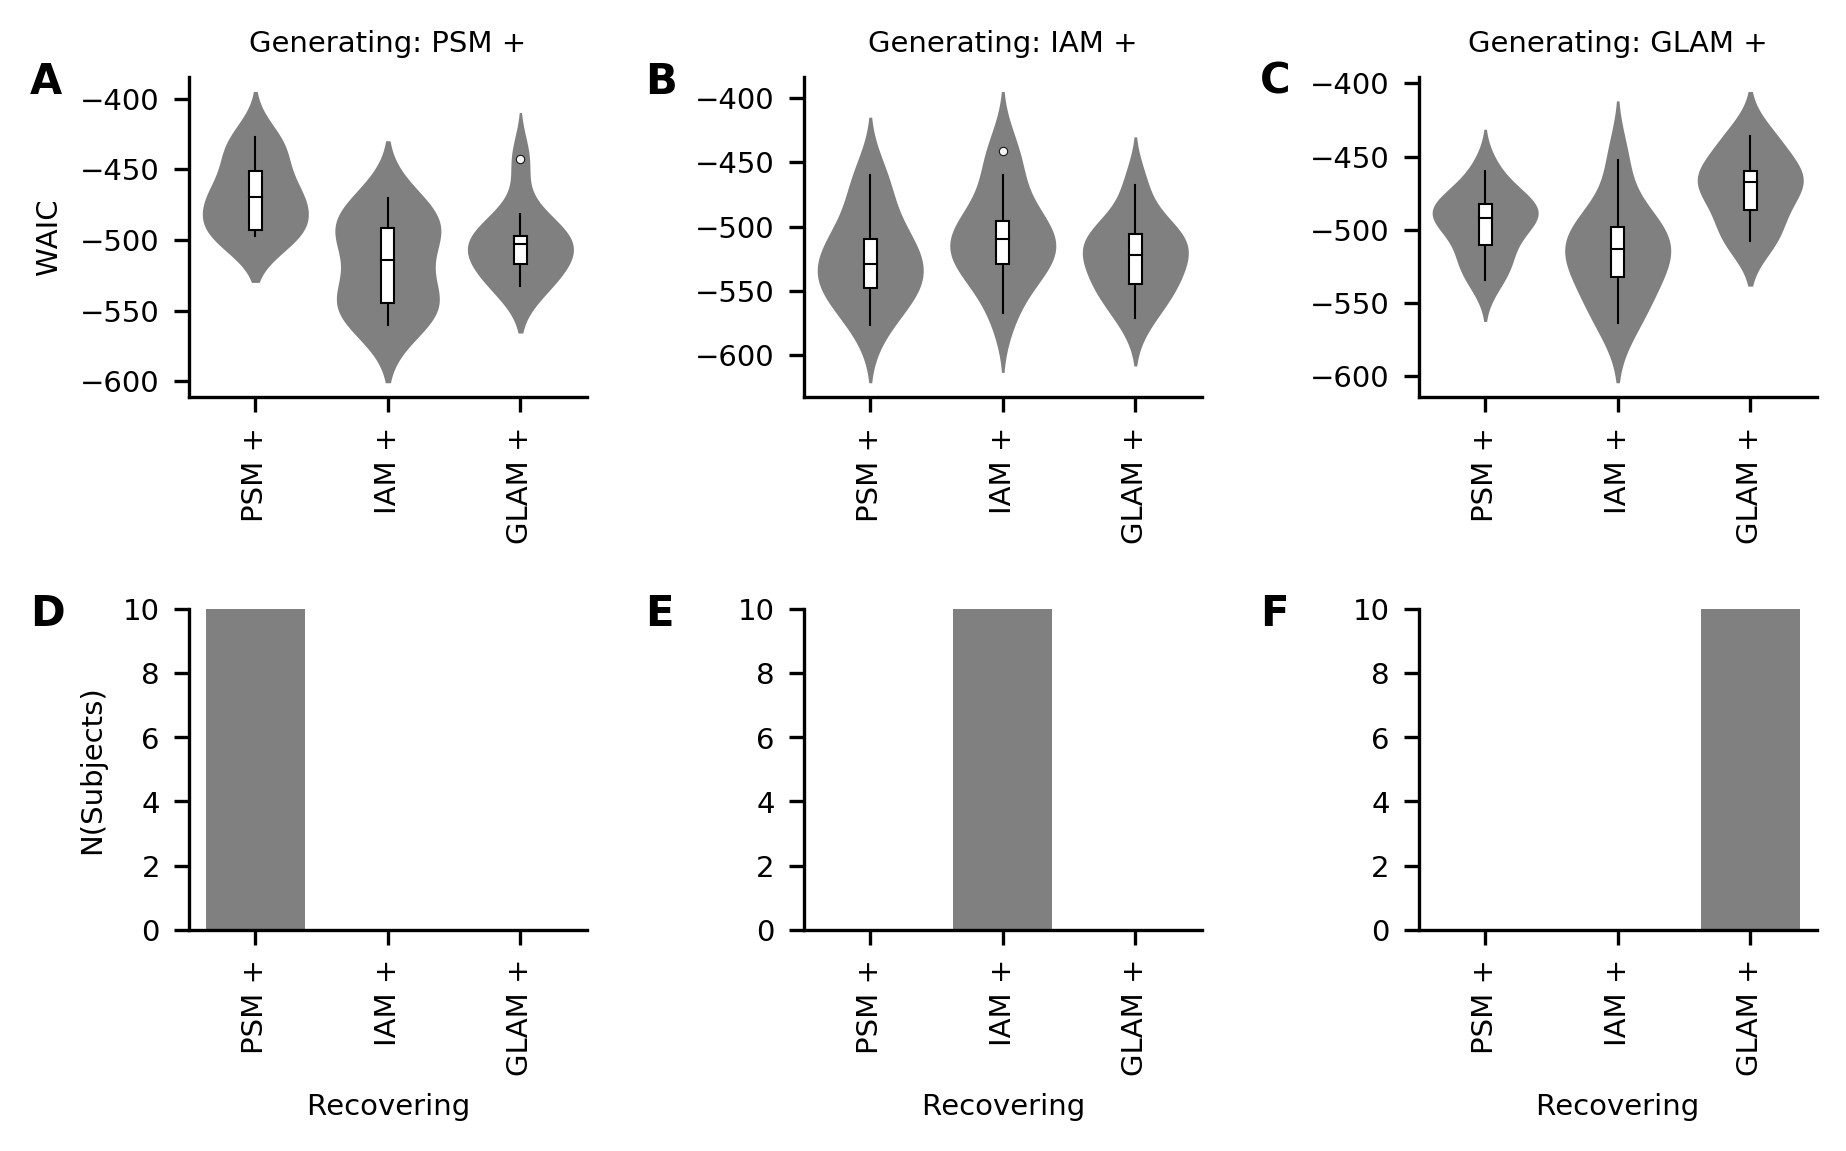

In [3]:
fig, axs = plt.subplots(2,3,figsize=cm2inch(16,10), dpi=300)

for mi, gen_model_name in enumerate(model_names):
    WAIC = np.zeros((10, len(model_names))) * np.nan
    subject_files = [f for f in os.listdir(path_recovery+'waic/') if
                         'gen-{}'.format('-'.join(gen_model_name.split('_'))) in f] 
    for s, subject_file in enumerate(subject_files):
        if os.path.isfile(path_recovery+'waic/'+subject_file):
            waic = pd.read_csv(path_recovery+'waic/'+subject_file)
            WAIC[s] = waic['WAIC'].values
    
    # plot violin
    axs[0,mi] = violin(data=pd.DataFrame(WAIC), ax=axs[0,mi], palette=['gray'])
    axs[0,mi].set_title('Generating: {}'.format(['PSM +', 'IAM +', 'GLAM +'][mi]), fontsize=7)
    axs[0,mi].set_xticks(np.arange(3))
    axs[0,mi].set_xticklabels(['PSM +', 'IAM +', 'GLAM +'], fontsize=7, rotation=90)
    axs[0,mi].tick_params(labelsize=7)
    axs[0,mi].set_xlabel('')
    if mi == 0:
        axs[0,mi].set_ylabel('WAIC', fontsize=7)
    else:
        axs[0,mi].set_ylabel('')

    # plot N best described
    axs[1,mi].bar(mi, np.sum(np.argmax(WAIC, axis=1)==mi), width=0.75, color=['gray'])
    axs[1,mi].set_xticks(np.arange(3))
    axs[1,mi].set_xticklabels(['PSM +', 'IAM +', 'GLAM +'], fontsize=7, rotation=90)
    axs[1,mi].tick_params(labelsize=7)
    axs[1,mi].set_xlim(-0.5, 2.5)
    if mi == 0:
        axs[1,mi].set_ylabel('N(Subjects)', fontsize=7)
    else:
        axs[1,mi].set_ylabel('', fontsize=7)
    axs[1,mi].set_ylim(0,len(subject_files))
    axs[1,mi].set_xlabel('Recovering', fontsize=7)

for label, ax in zip(list('ABCDEFGH'), axs.ravel()):
    despine(ax=ax)
    ax.text(-0.4, 1.05, label, transform=ax.transAxes,
            fontsize=10, fontweight='bold', va='top')
fig.tight_layout()

fig.savefig('figures/Figure-5-figure-supplement-2_model_recovery.pdf',dpi=300)
fig.savefig('figures/Figure-5-figure-supplement-2_model_recovery.jpg',dpi=300)
fig.savefig('figures/Figure-5-figure-supplement-2_model_recovery.png',dpi=300)